# 1. Récupération des données

In [18]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

c:\Users\hrey2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# 2. Séparation des données d’entraînement et de test

**Quelle est l’importance de mélanger les données avant de les diviser
en ensembles d’entraînement et de test ?**

Le mélange des données permet d’éviter que les données d’entraînement ne soient ordonnées et donc que le modèle ne soit pas capable de généraliser.

In [19]:
# split data into train and test with train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=1)

# 3. Visualisation d’une image

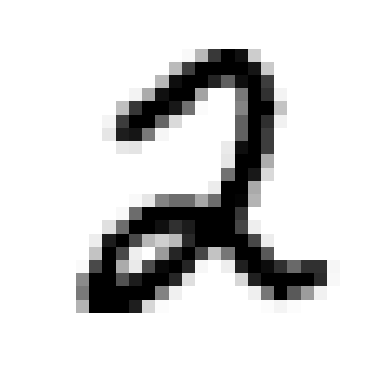

In [20]:
some_digit = x_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

# 4. Classificateur binaire

**Pourquoi devons-nous créer une variable cible binaire ?**

La variable cible binaire permet de savoir si l'image est un 5 ou non. La variable initiale indique la valeur de l'image ce qui n'est pas utile pour la classification binaire.

**Comment entraînons-nous le modèle SGDClassifier pour cette tâche de classification binaire ?**

On utilise la méthode fit() du modèle SGDClassifier avec les données d'entraînement et la variable cible binaire.



In [21]:
from sklearn.linear_model import SGDClassifier

#use SGDClassifier to find if a image is 2 or not

# create target vectors for classification task (is the digit 2 or not)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)


sgd_clf = SGDClassifier(random_state=1)

sgd_clf.fit(x_train, y_train_2)



SGDClassifier(random_state=1)

# 5. Précision et rappel (faux-positif/faux-négatif)

**Quelle est la signification de la précision et du rappel dans le contexte de la classification ?**

Le score de précision c'est la proportion de prédictions positives qui sont correctes.
Le score de rappel (recall) c'est la proportion de vrais positifs qui sont correctement prédits.

**Comment calculons-nous la précision et le rappel ?**

On utilise les fonctions precision_score() et recall_score() de sklearn.metrics.



In [22]:
from sklearn.metrics import precision_score, recall_score

y_pred = sgd_clf.predict(x_test)

print("precision_score is",precision_score(y_test_2, y_pred))
print("recall score is",recall_score(y_test_2, y_pred))

precision_score is 0.880846873461349
recall score is 0.8422787193973634


# 6. Comparaison avec RandomForestClassifier

**Quelle est la différence entre le SGDClassifier et le RandomForestClassifier ?**

SGDClassifier est une descente de gradient stochastique.
RandomForestClassifier est un ensemble de modèles d'arbres de décision.

**Comment comparons-nous les performances de ces deux classificateurs ?**

Il suffit de comparer les scores de précision et de rappel.

In [30]:
# let's use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=1)
forest_clf.fit(x_train, y_train_2)

RandomForestClassifier(random_state=1)

In [24]:
y_pred_forest = forest_clf.predict(x_test)

print("precision_score is",precision_score(y_test_2, y_pred_forest))
print("recall score is",recall_score(y_test_2, y_pred_forest))

precision_score is 0.9890965732087228
recall score is 0.8968926553672316


# 7. Classificateur multiclasse

**Comment adaptons-nous notre modèle pour effectuer une classification multiclasse ?**

Nous utilisons un modèle compatible avec la classification multiclasse comme SVC ou SGDClassifier. Nous utilisons la méthode fit() avec les données d'entraînement et la variable cible (non binaire).

**Quelles métriques d’évaluation devrions-nous utiliser pour évaluer la performance de ce modèle ?**

Nous devrions utiliser la matrice de confusion et le score F1.


In [25]:
# Classificateur multiclasse avec SGDClassifier (Support Vector Classification base support vector machine)
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [26]:
# use SDG for multiclass classification 
sgd_clf_multi = SGDClassifier()
sgd_clf_multi.fit(x_train, y_train)

SGDClassifier()

In [32]:
# matrice de confusion
from sklearn.metrics import confusion_matrix, f1_score

# test SVC
y_pred_svc = svm_clf.predict(x_test)
print("precision_score is",precision_score(y_test, y_pred_svc,average='macro'))
print("recall score is",recall_score(y_test, y_pred_svc,average='macro'))
print("f1 score is",f1_score(y_test, y_pred_svc,average='macro'))
conf_mx = confusion_matrix(y_test, y_pred_svc)
print("confusion matrix is",conf_mx)



precision_score is 0.9777282476282615
recall score is 0.9777622828274073
f1 score is 0.9777335207499404
confusion matrix is [[2058    0    4    1    2    1    5    0    3    2]
 [   1 2366   13    4    1    0    0    3    1    1]
 [   6    3 2081    6    6    1    2    8    8    3]
 [   2    1   14 2083    1   17    1   17   18   11]
 [   1    5    5    0 2016    0    6    5    1   24]
 [   2    1    2    8    8 1881   13    1    4    3]
 [   6    0    2    0    2    8 1973    0    8    0]
 [   3    6    6    1   14    1    0 2102    5   18]
 [   5    7    6   13    6   14    5    3 1982    7]
 [   4    7    5   11   14    1    1   17    3 1993]]


In [34]:
# matrice de confusion
from sklearn.metrics import confusion_matrix, f1_score

# test SDGClassifier
y_pred_sgd = sgd_clf_multi.predict(x_test)
print("precision_score is",precision_score(y_test, y_pred_sgd,average='macro'))
print("recall score is",recall_score(y_test, y_pred_sgd,average='macro'))
print("f1 score is",f1_score(y_test, y_pred_sgd,average='macro'))
conf_mx_sgd = confusion_matrix(y_test, y_pred_sgd)
print("confusion matrix is",conf_mx_sgd)


precision_score is 0.8870318773509916
recall score is 0.8824096151375068
f1 score is 0.8819204586183356
confusion matrix is [[1974    0   10   10    5   33   22    1   18    3]
 [   1 2302   30    1    1   25    3    3   16    8]
 [  10   11 1920   24   23   35   21   20   47   13]
 [   5    3  114 1597    3  312    8   31   54   38]
 [   5    7   23    9 1752   44   26   19   20  158]
 [   6    6   18   28   25 1713   59    5   50   13]
 [  14    0   19    1   10   35 1902    0   18    0]
 [  10    4   29    7   21   19    4 1966   11   85]
 [  12   29   40   37   14  214   22   10 1627   43]
 [   5    6    9   19   39   77    0   82   29 1790]]


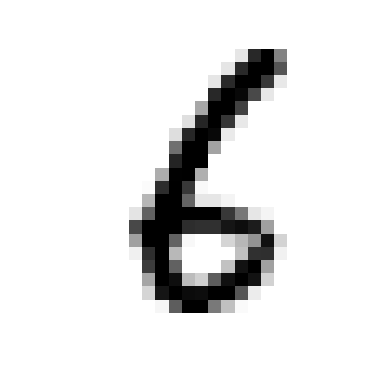

the model predicted 6 and the real value is 6


In [29]:
from random import randint

# test 
rand = randint(0,len(x_test)-1)
some_digit = x_train[rand]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

print("the model predicted",svm_clf.predict([some_digit])[0], "and the real value is",y_train[rand])